importing all the required libraries that i may require

In [70]:
# Importing the libraries
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore", message="Numerical issues were encountered ")

Create a dictionary to convert the integer value predicted at the end to name of specific feild

In [71]:
#dictionary
field = {1:"sport",
          2:"business",
          3:"politics",
          4:"tech",
          5:"entertainment"
          }

Taking input from the user and converrting it to required dataframe.Also loading the train dataset

In [72]:
s="Hello I am playing cricket"
d = {'category':0, 'text':s}
inp = pd.DataFrame(d,index=[0])
# Importing the dataset
dataset1 = pd.read_csv('bbc.csv',encoding='latin-1')
dataset2 = dataset1.iloc[0:2225,[0,1]]
dataset2['text'].fillna(value="good", inplace=True)
dataset = dataset2.append(inp,ignore_index=True)

In [73]:
dataset.head(10)

,category,text
0,4,tv future in the hands of viewers with home th...
1,2,worldcom boss left books alone former worldc...
2,1,tigers wary of farrell gamble leicester say ...
3,1,yeading face newcastle in fa cup premiership s...
4,5,ocean s twelve raids box office ocean s twelve...
5,3,howard hits back at mongrel jibe michael howar...
6,3,blair prepares to name poll date tony blair is...
7,1,henman hopes ended in dubai third seed tim hen...
8,1,wilkinson fit to face edinburgh england captai...
9,5,last star wars not for children the sixth an...


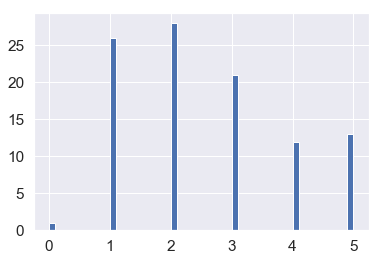

In [74]:
dataset['category'].hist(bins=50)

Cleaning the text.Extracting only the important words that may affect the behaviour.Using Natural Language Processing to extract words.

In [75]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,2226):
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

print("data filtered")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sankalp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


data filtered


In [76]:
print(corpus[5])

howard hit back mongrel jibe michael howard said claim peter hain tori leader act like attack mongrel show labour rattl opposit upbeat speech parti spring confer brighton said labour campaign tactic prove tori hit home mr hain made claim tori tactic anti terror bill debat someth tell someon somewher littl bit rattl mr howard said mr hain leader common told bbc radio four today programm mr howard stanc govern anti terror legisl put countri risk accus tori leader behav like attack mongrel play opposit opposit sake mr howard told parti labour would anyth say anyth claim anyth cling offic cost far year compar fagin shylock fli pig morn peter hain even call mongrel know someth tell someon somewher littl bit rattl environ secretari margaret beckett reject mr howard comment tell radio pm programm labour rattl real duti tri get peopl focu michael howard record propos tri put forward countri also mani exampl see believ realli poor judgement behalf mr howard said tori polici school tax immigr cr

Creating a bag of words from the corpus generated array

In [77]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 0].values

In [78]:
X

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Spliting the dataset into train and test from better results.

In [79]:
print("Split begin")
    
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Split begin


Starting the model training using StartifiedKFold technique and Stacking

In [80]:
#stacking
def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y):
        x_train,x_val=train[train_indices],train[val_indices]
        y_train,y_val=y[train_indices],y[val_indices]
            
        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
        test_pred=np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred

Creating a random forest classifier and applying Hyperparameter tuning to obtain the correct values of parameter

In [81]:
#Random forest
print("Random forest")
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
# Creating the hyperparameter grid  
param_dist = {"n_estimators": [50,100,150], 
                  "max_features": randint(1, 9), 
                  "min_samples_leaf": randint(1, 9), 
                  "criterion": ["gini", "entropy"]} 
classifier = RandomForestClassifier()
random_cv = RandomizedSearchCV(classifier, param_dist, cv = 5)
test_pred2 ,train_pred2=Stacking(model=random_cv,n_fold=5,train=X_train,test=X_test,y=y_train)

# Print the tuned parameters and score 
print("Tuned Random Forest Parameters: {}".format(random_cv.best_params_)) 
print("Best score is {}".format(random_cv.best_score_)) 

Random forest


C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parame

Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 150}
Best score is 0.49230769230769234


Creating a Decision tree classifier and applying hyper parameter tuning

In [82]:
 #Decision tree
print("Decision Tree Classifier")
from scipy.stats import randint
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
                  "max_features": randint(1, 9), 
                  "min_samples_leaf": randint(1, 9), 
                  "criterion": ["gini", "entropy"]} 
model1 = DecisionTreeClassifier(random_state=1)
model1_cv = RandomizedSearchCV(model1, param_dist, cv = 5)
test_pred3 ,train_pred3=Stacking(model=model1_cv,n_fold=5, train=X_train,test=X_test,y=y_train)
    
    
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(model1_cv.best_params_)) 
print("Best score is {}".format(model1_cv.best_score_)) 

Decision Tree Classifier


C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parame

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 7}
Best score is 0.35384615384615387


C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Creating a KNearest Classifier and applying the same.

In [83]:
print("K Neighbours Classifier")
from scipy.stats import randint
# Creating the hyperparameter grid  
param_dist = {"n_neighbors": [5, 10], 
                  "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]} 
model2 = KNeighborsClassifier()
model2_cv = RandomizedSearchCV(model2, param_dist, cv = 5)
test_pred4 ,train_pred4=Stacking(model=model2_cv,n_fold=5, train=X_train,test=X_test,y=y_train)
    
    
# Print the tuned parameters and score 
print("Tuned KNN Parameters: {}".format(model2_cv.best_params_)) 
print("Best score is {}".format(model2_cv.best_score_)) 

K Neighbours Classifier


C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 8 is smaller

Tuned KNN Parameters: {'n_neighbors': 10, 'algorithm': 'auto'}
Best score is 0.4


C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Converting the results obtained from the above models to data frame

In [84]:
#converting to dataframe
    
train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)
    
train_pred3=pd.DataFrame(train_pred3)
test_pred3=pd.DataFrame(test_pred3)
    
train_pred4=pd.DataFrame(train_pred4)
test_pred4=pd.DataFrame(test_pred4)

Applying Second Level Model to combine the result of all the above models

In [85]:
print('Logistic Regression')
df = pd.concat([ train_pred2,train_pred3,train_pred4], axis=1)
df_test = pd.concat([ test_pred2,test_pred3,test_pred4], axis=1)
df_test = df_test.fillna(0)
model = LogisticRegression(random_state=1)
model.fit(df,y_train)
y_pred = model.predict(df_test)

Logistic Regression


C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sankalp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [86]:
arr = y_pred[0:len(y_test)]

Analysis the results and the accuracy obtained

In [87]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, arr)
print("confusion matrix is:")
print(cm)

confusion matrix is:
[[0 9 0 0 0]
 [0 2 0 0 0]
 [0 6 0 0 0]
 [0 2 0 0 0]
 [0 2 0 0 0]]


In [88]:
import seaborn as sn

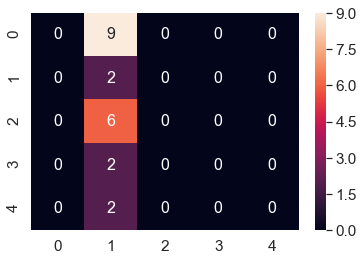

In [90]:
df_cm = pd.DataFrame(cm, range(5),
                  range(5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

The final output of the result

In [91]:
output = y_pred[-1]
print("output is:")
print(field[output])

output is:
sport
